### `MulitIP`: extend the `ImagePoints` class for better Visualization & Display

This uses a custom dataset and models; skip to section `(Re-)Create Input Objects` to reporduce the data to run the examples.

Skip to section `Main Viz Demo Section` to view Features.

In [30]:
import os, sys
import numpy as np
from fastai.vision import *

#TODO - import from main library
from modules.ap3graph import MultiIp

%reload_ext autoreload
%autoreload 2

In [32]:
'''
TODO
[~] add hyper links to section headers, e.g. 'Visual Displays'
[x] finish this example
[x] build manually reconstruction example
[ ] explicitly import MultiIP
[ ] embed image in notebook, e.g. through stringify
[ ] show a code use example in header
[~] add a easier example
[ ] typing on the class
[ ] better doc string on class
    [ ] list_ips format
    [ ] add example-notebook's path to class doc string
'''
pass

**Two Main Features & Rationale**

Currently, multiple points can be plotted, and they can use any styling available to matplotlib. But we can't use separate styles for different points on the same image. 

This can be confusing because we might want to plot points for two models and compare results and we can't tell which point point correspond to which model, or because there are multiple points that correspond to semanitacally different features (e.g. nose-tip, mouth-left, mouth-right, etc) and it's unclear which point is supposed to correspond to which feature. 

This class allows us to:

 - Plot points with different styles: useful for comparing the prediction output of two models.
 
 - Label points via labels or legend: useful for differentiating the semantics of points.

**Concise Example**

    # create: img, ip1, ip2
    universal_params = {'marker':'o', 's':100}
    mip = MultiIp(list_ips=[ip1, ip2], 
                  list_params=[{'c':'y', **universal_params, },
                               {'c':'r', **universal_params, }])
    # display ip1 points as yellow and ip2 points as red
    img.show(y=mip)

**Class Design**

Tradionally, `Image.show`is passed an `ImagePoints` object for its `y` argument to plot point[s] on an image. That method uses the following line:

    if y is not None: y.show(ax=ax, **kwargs)
    
So, `MultiIP` also has `show` method which will be called when passed in. But it's capable of more functionality, its display options are initialized in construction, before / outside `Image.show` and it can handle all previous functionality through sharing the same arguments and passing kwargs.

With this design, MultiIp allows lots of functionality extension without interfering with or changing any existing objects.

##### Setup Comparison Objects: datasets and learners

In [3]:
data1 = build_data(size=(288, 432), batch_size=8)
learn1 = cnn_learner(data1, models.resnet34)
_ = learn1.load('ap4-big-1')

data2 = build_data(size=(288, 432), batch_size=32)
learn2 = cnn_learner(data2, models.resnet50)
_ = learn2.load('ap4-resnet50-1')

datasets = [data1, data2]
learners = [learn1, learn2]

##### Setup  Display Objects: points & image (SKIP if not re-creating)

In [22]:
np.random.seed(42)
i = np.random.randint(0, len(data1.valid_dl.x.items) - 1)

fn = data1.valid_dl.x.items[i]
img = data1.valid_dl.x.get(i)
truth_pts = data1.valid_dl.y.items[i]

pred_pts1 = learn1.predict(img)
pred_pts2 = learn2.predict(img)

def scaled_pts(pts):
    return scale_flow(FlowField(pts.size, pts.data), to_unit=False).flow.flip(1)

pred_pts1 = scaled_pts(pred_pts1[0])
pred_pts2 = scaled_pts(pred_pts2[0])

pred_pts1 = tensor([[e[1],e[0]] for e in list(pred_pts1)])
pred_pts2 = tensor([[e[1],e[0]] for e in list(pred_pts2)])

def get_ip(img,pts): 
    return ImagePoints(FlowField(img.size, pts), scale=True, y_first=True)

ip1 = get_ip(img2, pred_pts1)
ip2 = get_ip(img2, pred_pts2)

##### View Viz Input objects

In [23]:
print(pred_pts1)
print(pred_pts2)
print(ip1, ip1.data)
print(ip2, ip2.data)

tensor([[ 74.5809, 109.6926],
        [ 78.6673, 238.8884],
        [203.9195, 230.4293],
        [196.1395,  96.6065]])
tensor([[ 67.2359, 116.2628],
        [ 67.3061, 259.2588],
        [210.8090, 258.1133],
        [210.9947, 109.6959]])
ImagePoints (864, 1296) tensor([[-0.8274, -0.8307],
        [-0.8179, -0.6313],
        [-0.5280, -0.6444],
        [-0.5460, -0.8509]])
ImagePoints (864, 1296) tensor([[-0.8444, -0.8206],
        [-0.8442, -0.5999],
        [-0.5120, -0.6017],
        [-0.5116, -0.8307]])


##### (Re-)Create Input Objects
These objects are re-created from actual outputs from two learners trained on this dataset:

pred_pts1 - represent transformed output of learner1.predict(img), and

pred_pts2 - represent the same from learner2

These hard-coded values allow you to run the example in this notebook for a visualization.

In [24]:
def get_ip(img,pts): 
    ''' from dl1-lesson3-camvid'''
    return ImagePoints(FlowField(img.size, pts), scale=True, y_first=True)

pred_pts1 = tensor([[ 74.5809, 109.6926],
                    [ 78.6673, 238.8884],
                    [203.9195, 230.4293],
                    [196.1395,  96.6065]])
pred_pts2 = tensor([[ 67.2359, 116.2628],
                    [ 67.3061, 259.2588],
                    [210.8090, 258.1133],
                    [210.9947, 109.6959]])

ip1 = get_ip(img, pred_pts1)
ip2 = get_ip(img, pred_pts2)

In [38]:
print(ip1, ip1.data, ip2, ip2.data, sep='\n')

ImagePoints (864, 1296)
tensor([[-0.8274, -0.8307],
        [-0.8179, -0.6313],
        [-0.5280, -0.6444],
        [-0.5460, -0.8509]])
ImagePoints (864, 1296)
tensor([[-0.8444, -0.8206],
        [-0.8442, -0.5999],
        [-0.5120, -0.6017],
        [-0.5116, -0.8307]])


##### Main Viz Demo Section

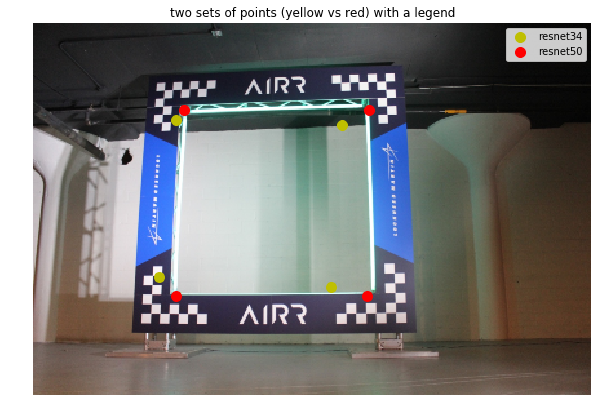

In [39]:
#TODO - move this to recreate objects section
size=(288, 432)
img2 = img.clone()
_ = img2.resize(size=(3,*size))

### Different Colors + Legend Example -------------

# build the params that ALL point sets use: 
# here we share marker-shape and size
univ_params = {'marker':'o', 's':100}

mip = MultiIp(list_ips=[ip1, ip2], 
              list_params=[{'c':'y', **univ_params, },   # combine univ_params with variable
                           {'c':'r', **univ_params, }    # param: color yellow vs red
                          ],
              labels=False,
              legend=['resnet34', 'resnet50'],    # use legend to distinguish separate sets of points
            )

img2.show( 
         y=mip
        ,title="two sets of points (yellow vs red) with a legend"
        ,figsize=(10, 10)
        )

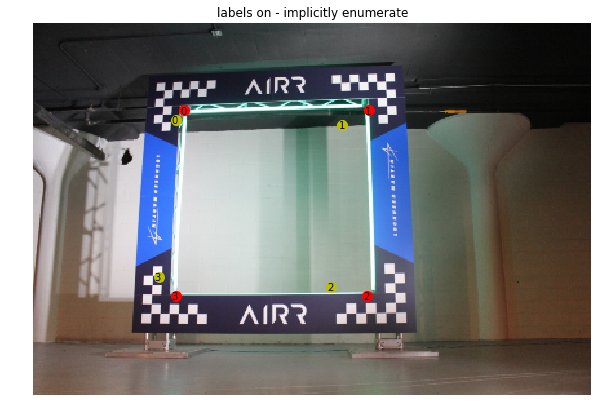

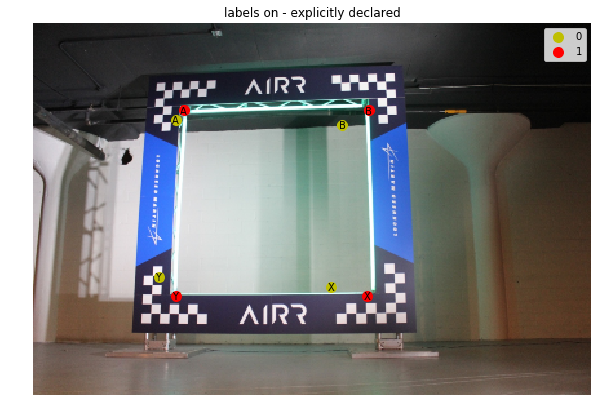

In [40]:
### Labelling Example 1 -----------------------------

univ_params = {'marker':'o', 's':100}

mip1 = MultiIp(list_ips=[ip1, ip2], 
              list_params=[{'c':'y', **univ_params, },   # different colors correspond to
                           {'c':'r', **univ_params, }    # dinstinct point-sets
                          ],
              legend=False,    # legend off
              labels=True,     # labels-on
              label_enumerate=True,  #labels enumerate by order within their respective IP object
            )

img2.show( 
         y=mip1
        ,title="labels on - implicitly enumerate"
        ,figsize=(10, 10)
        )

### Labelling Example 2 ---------------------------------

univ_params = {'marker':'o', 's':100}    

mip2 = MultiIp(list_ips=[ip1, ip2], 
              list_params=[{'c':'y', **univ_params, },   
                           {'c':'r', **univ_params, }    
                          ],
              labels=['A','B','X','Y'],             # labels-on: explicitly define
              legend=True,                          # legend on: implicitly strategy of numbering
            )

img2.show( 
         y=mip2
        ,title="labels on - explicitly declared"
        ,figsize=(10, 10)
        )